In [28]:
# Import packages 
import pandas as pd
import numpy as np
import math
import os 
import random

from datetime import datetime
from datetime import timedelta
import datetime
from datetime import date
import time
from scipy.io import arff

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import utils

from sklearn.preprocessing import StandardScaler
#from keras.models import Sequential
#from keras.layers import Dense

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')


In [2]:
# Input datasets 
data = pd.read_csv('bank-additional-full.csv', ';')
data



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data cleaning part.


In [3]:
#We are beginning to clean the data by dropping the unnecessary columns.
data_clean = data.drop(['contact' , 'month', 'day_of_week'], axis=1)
data_clean

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Getting dummies.

In [4]:
#We need to get dummies since we have a lot of "str" data. in order to get use of those data
#we need to convert these columns into dummies.
data_clean = pd.get_dummies(data_clean, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y' ], drop_first=True)
data_clean

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,0,0,1,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,0,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,1,0,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,0,0,1,0,1


# Data preparation part.

In [5]:
#We are starting to prepare our data to use it in our forecasting models.
#We define number of PCA, and clusters.

num_pca_min_initial = 4

df = data_clean.copy()

num_pca = 4

num_cluster = 15


In [6]:
#We are trying to decrease column size and remove noise from the data. 
#Therefore, PCA will help us by assigning new variables according to joint raw and column data.
# Create PCA 
def PCA_short(group):
    df_group=group.copy()
    df_comp_group=group.copy()

    scaler_group = StandardScaler()
    scaler_group.fit(group)
    scaled_data_group = scaler_group.transform(group)

    pca_group = PCA(n_components = num_pca)
    pca_group.fit(scaled_data_group)
    x_pca_group = pca_group.transform(scaled_data_group)
    df_comp_group=pd.DataFrame(pca_group.components_)
    return x_pca_group

df_short_pca = PCA_short(df)


In [25]:
df_short_pca

array([[-1.48735034,  1.6896103 ,  0.18099482, -0.79434367],
       [-1.6923414 ,  1.21171934,  0.10507909, -0.01972287],
       [-1.3176812 , -0.10260201, -0.22693511, -0.15541546],
       ...,
       [ 1.50273008,  1.71993265, -0.90839803,  0.59586937],
       [ 1.71411268,  0.24674398, -0.11924962, -0.11588732],
       [ 2.9622964 ,  3.19756902, -0.60453692, -0.19445051]])

In [7]:
#We are creating clusters which will help us to arrange our customers to a level.
#Similar joint data will be located in similar clusters.
# Create clusters
def kcentroid(df):
        kmeans_df=KMeans(n_clusters = num_cluster)
        kmeans_df.fit(df)

        centroids_df=kmeans_df.cluster_centers_
        labels_df=kmeans_df.labels_

        clusters_df=pd.DataFrame(labels_df)
        clusters_df["cluster"]=clusters_df
        clusters_df=clusters_df.assign(rec_id=np.arange(len(clusters_df))).reset_index(drop=True)

        return clusters_df

cl1 = kcentroid(df_short_pca)


In [8]:
cl1

,0,cluster,rec_id
0,4,4,0
1,4,4,1
2,0,0,2
3,4,4,3
4,4,4,4
...,...,...,...
41183,14,14,41183
41184,12,12,41184
41185,14,14,41185
41186,5,5,41186


In [9]:
#We create rec_id to easily access the indexes and we drop "0".
# Create record id and assign clusters
df2 = df.assign(rec_id=np.arange(len(df))).reset_index(drop=True)

cl2 = cl1.drop([0], axis=1)

# Merge 
cl3 = df2.merge(cl2, on="rec_id", how="inner", validate="1:1")

cl3.drop(['rec_id'],axis=1,inplace=True)


In [10]:
#We are checking whether we have any null or any unrelated column.

cl3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

In [11]:
#We are creating dummies for clusters to remove its weight effect on forecasts.
#We dont want our model to be confused by just the number of clusters.

cl3 = pd.get_dummies(cl3, columns=['cluster'], drop_first=True)
cl3

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,0,0,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,0,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,0,0,0,0,1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,0,0,0


# # Data splitting

In [12]:
# B Create X and y

df_1 = cl3.copy()

X_train_raw = df_1.copy()

#We need to drop "y_yes" since it is the column that we want our model to forecast.
X_train_raw.drop(['y_yes'],axis=1,inplace=True)

# Split data for X and y by 30 percent of each.
X_train, X_test, y_train, y_test = train_test_split(X_train_raw, 
                        df_1['y_yes'], test_size=0.30, 
                                                    random_state=101)


In [13]:
#Controlling if it is splitted, and shuffled correctly.

X_test

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14
3669,32,270,1,999,0,1.1,93.994,-36.4,4.859,5191.0,...,0,0,0,0,0,0,0,0,0,0
20131,57,72,2,999,0,1.4,93.444,-36.1,4.965,5228.1,...,0,0,0,0,0,0,0,0,1,0
2492,33,160,3,999,0,1.1,93.994,-36.4,4.856,5191.0,...,0,0,0,0,0,0,0,0,1,0
14088,29,104,2,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,1,0,0,0,0,0,0
34986,27,12,5,999,0,-1.8,92.893,-46.2,1.250,5099.1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10909,41,147,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,1,0,0,0,0,0,0
13525,36,209,1,999,0,1.4,93.918,-42.7,4.963,5228.1,...,0,0,0,1,0,0,0,0,0,0
27228,57,283,1,999,1,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,0,0,0,0,0,0,0,0
23043,32,60,4,999,0,1.4,93.444,-36.1,4.965,5228.1,...,0,0,0,0,0,0,0,0,1,0


# Training the models.

In [15]:
# C. Train models
# # C.1 Logistic regression

model_type = 'logit'

logit = LogisticRegression()

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

utils.multiclass.type_of_target(encoded)
logit.fit(X_train, encoded)

# logit.fit(X_train, y_train2)
# Make predictions
logit_pred = logit.predict(X_test)

pred_logit = pd.DataFrame(logit_pred.T)

# Put predictions into a dataframe and merge predictions with the actuals
pred_logit['pred'] = pred_logit

pred_logit2 = pred_logit[['pred']]

y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

pred_logit3 = pd.concat([pred_logit2, y_test_df], axis=1)

#we only created "average percentage error" and not the "diff" since it 
#becomes meaningless because our data includes high number of zero due to 
#lots of dummies. (Implied the same on each model below.)

pred_logit3['ape'] = abs(pred_logit3['y_yes'] - pred_logit3['pred'])

pred_logit3['model'] = model_type





In [17]:
# # C.2. Linear regression

model_type = 'linreg'

linreg = LinearRegression()

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

utils.multiclass.type_of_target(encoded)
linreg.fit(X_train, encoded)

# lineg.fit(X_train, y_train2)
# Make predictions
linreg_pred = linreg.predict(X_test)

pred_linreg = pd.DataFrame(linreg_pred.T)

# Put predictions into a dataframe and merge predictions with the actuals
pred_linreg['pred'] = pred_linreg

pred_linreg2 = pred_linreg[['pred']]

y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

pred_linreg3 = pd.concat([pred_linreg2, y_test_df], axis=1)

pred_linreg3['ape'] = abs(pred_linreg3['y_yes'] - pred_linreg3['pred'] )

pred_linreg3['model'] = model_type





In [18]:
# # C.3. SVM regression
model_type = 'svmr'

svmr = SVR()

svmr.fit(X_train, y_train)

# Make predictions
svmr_pred = svmr.predict(X_test)

pred_svmr = pd.DataFrame(svmr_pred.T)

# Put predictions into a dataframe and merge predictions with the actuals
pred_svmr['pred'] = pred_svmr

pred_svmr2 = pred_svmr[['pred']]

y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

pred_svmr3 = pd.concat([pred_svmr2, y_test_df], axis=1)

pred_svmr3['ape'] = abs(pred_svmr3['y_yes'] - pred_svmr3['pred'] )

pred_svmr3['model'] = model_type




In [19]:
# # C.4. Random forest regressor

model_type = 'rfr'

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

# Make predictions
rfr_pred = rfr.predict(X_test)

pred_rfr = pd.DataFrame(rfr_pred.T)

# Put predictions into a dataframe and merge predictions with the actuals
pred_rfr['pred'] = pred_rfr

pred_rfr2 = pred_rfr[['pred']]

y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

pred_rfr3 = pd.concat([pred_rfr2, y_test_df], axis=1)

pred_rfr3['ape'] = abs(pred_rfr3['y_yes'] - pred_rfr3['pred'] )

pred_rfr3['model'] = model_type




# Evaluation

In [20]:
# D. Evaluate models 

# Concatenate the model to the all model database
pred_model3 = pd.concat([pred_rfr3, pred_logit3, pred_svmr3, 
                        pred_linreg3, pred_logit3], axis=0).reset_index(drop=True)


In [ ]:
pred_model3

In [21]:
# We are ready to use Customized scoring tool. 
# Define reward and punishment factors in the light of instructions.
gain = 50 

# Overforecasting
overfcst_limit = 0.10

overfcst_cost = -3 

# Underforecasting
underfcst_limit_1 = -0.10

underfcst_cost = -2


In [22]:

# Calculate profit for overforecasting within the limits
pred_model3.loc[(pred_model3['pred']<overfcst_limit) & (pred_model3['pred']>=0), 'profit'] = gain

pred_model3.loc[(pred_model3['pred']>overfcst_limit)  , 'status'] = 'overforecast_1'


In [26]:
# Define reward and punishment factors
gain = 50 

# Overforecasting
overfcst_limit = 0.10

overfcst_cost = -3 

# Underforecasting
underfcst_limit_1 = -0.10

underfcst_cost = -2

# Calculate profit for overforecasting within the limits
pred_model3.loc[(pred_model3['pred']<overfcst_limit) & (pred_model3['pred']>=0), 'profit'] = gain

pred_model3.loc[(pred_model3['pred']<overfcst_limit) & (pred_model3['pred']>=0) , 'status'] = 'overforecast_1'

# Calculate cost for overforecasting outside the limits
pred_model3.loc[(pred_model3['pred']>=overfcst_limit) , 'profit'] = overfcst_cost

pred_model3.loc[(pred_model3['pred']>=overfcst_limit) , 'status'] = 'overforecast_2'

# Calculate cost and gain for underforecasting within the limits
pred_model3.loc[(pred_model3['pred']>=underfcst_limit_1) & (pred_model3['pred']<0), 'profit'] = gain

pred_model3.loc[(pred_model3['pred']>=underfcst_limit_1) & (pred_model3['pred']<0), 'status'] = 'underforecast_1'

# Calculate cost and gain for underforecasting within the limits
pred_model3.loc[(pred_model3['pred']<underfcst_limit_1), 'profit'] = underfcst_cost

pred_model3.loc[(pred_model3['pred']<underfcst_limit_1), 'status'] = 'underforecast_2'

#pred_model3['profit'] = pred_model3['profit'].astype(int)

# Take the sum of profit for all models
pred_model3_grp = pred_model3.groupby(['model']).agg({'profit':'sum'}).reset_index()


# Visualization

<Axes: xlabel='model', ylabel='profit'>

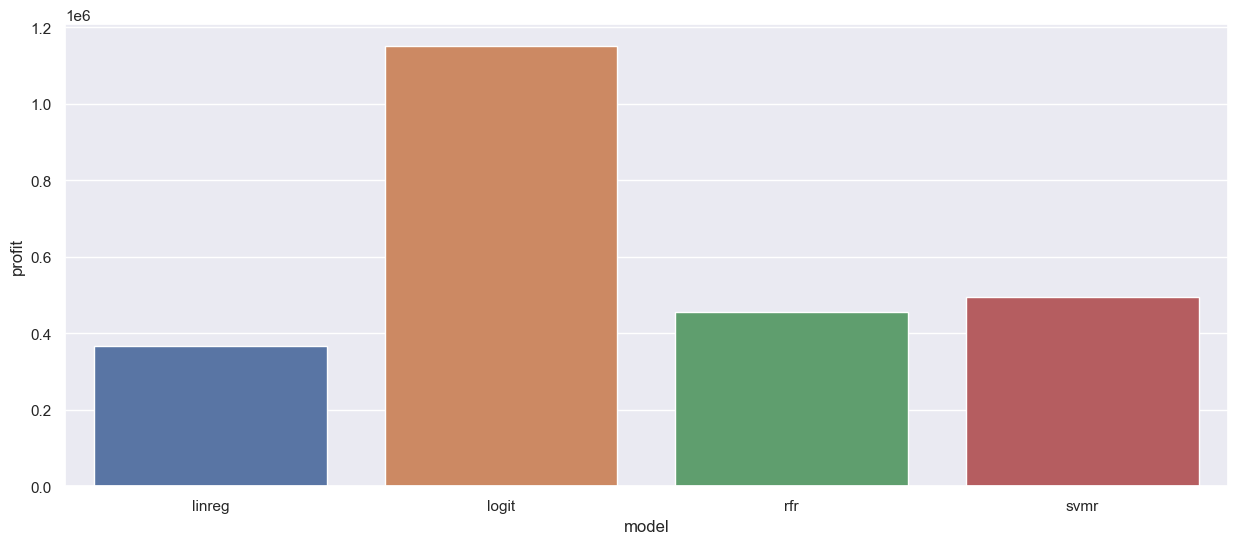

In [27]:
# E. Visualize results to identify the best model

sns.set_style('whitegrid')

sns.set(rc={'figure.figsize':(15,6)})

sns.barplot(x='model', y='profit', data=pred_model3_grp, estimator=np.mean)
